In [3]:
%matplotlib inline
%load_ext autoreload
import numpy as np
import pandas as pd
import scipy as sp
import scipy.io
import datetime
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import normalize
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import loader
import neuralnet
%aimport neuralnet
%aimport loader
%aimport

Modules to reload:
loader neuralnet

Modules to skip:



In [6]:
import loader

In [8]:
def squared_error(y, y_hat):
    return (y - y_hat).dot((y - y_hat))

def squared_error_prime(y, y_hat):
    return -1 * (y - y_hat)

def cross_ent(y, y_hat):
    part1 = y.dot(np.log(y_hat))
    part2 = (1.0 - y).dot(np.nan_to_num(np.log(1.0 - y_hat)))
    return -(part1 + part2)

def cross_ent_prime(y, y_hat):
    part1 = y / y_hat
    part2 = (1 - y)/(1 - y_hat)
    return -(part1 - part2)
    
def t(z):
    return np.tanh(z)

def t_prime(z):
    return 1 - np.power(t(z), 2)

def g(z):
    return (1.0 / (1.0 + np.exp(-z)))

def g_prime(z):
    return g(z) * (1 - g(z))

transforming
tfidf
for test
returning


In [32]:
%autoreload
xy = loader.XY10()
X = xy['X_train'].toarray()
y = xy['y_train']
y = pd.get_dummies(y).values
XVal = xy['X_val'].toarray()
yVal = xy['y_val']
yVal = pd.get_dummies(yVal).values

In [46]:
%autoreload
input_dim = len(X[0])
output_dim = len(y[0])
hl_size = 150

layer1 = neuralnet.Layer((input_dim, hl_size), t, t_prime)
layer2 = neuralnet.OutputLayer((hl_size, output_dim), g, g_prime)

nn = neuralnet.NeuralNet(layer1, layer2, cross_ent, cross_ent_prime)
nn.train(X, y, num_iters=300000, score_every=50000, eta=0.01, XVal=XVal, yVal=yVal)

Total Train Time 209.53 Seconds


/Users/bill_chambers/AeroFS/Dev/mlproject/walmart/neuralnet.py:109: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if XVal != None:


Parameters used {'score_every': 50000, 'end': datetime.datetime(2015, 12, 9, 15, 50, 29, 473171), 'eta': 0.01, 'num_iters': 300000, 'start': datetime.datetime(2015, 12, 9, 15, 46, 59, 945286)}
Training Accuracy 0.646912031775
Validation Accuracy 0.323752286386


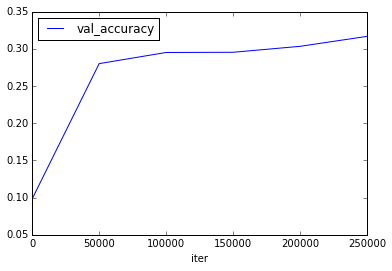

In [47]:
print("Parameters used", nn.train_params)
nn.resulting_scores()[['val_accuracy', 'iter']].plot(x='iter')
print("Training Accuracy", nn.score(X,y)/len(X))
print("Validation Accuracy", nn.score(XVal,yVal)/len(XVal))

In [72]:
%autoreload
xy = loader.XY16()
X = xy['X_train']
y = xy['y_train']
y = pd.get_dummies(y).values
XVal = xy['X_val']
yVal = xy['y_val']
yVal = pd.get_dummies(yVal).values

In [73]:
from sklearn.preprocessing import normalize

In [81]:
X = normalize(X)
XVal = normalize(XVal)

In [92]:
%autoreload
input_dim = len(X[0])
output_dim = len(y[0])
hl_size = 200

layer1 = neuralnet.Layer((input_dim, hl_size), t, t_prime)
layer2 = neuralnet.OutputLayer((hl_size, output_dim), g, g_prime)

nn = neuralnet.NeuralNet(layer1, layer2, cross_ent, cross_ent_prime)
nn.train(X, y, num_iters=8000000, score_every=1000000, eta=0.001, XVal=XVal, yVal=yVal)

Total Train Time 2080.57 Seconds


/Users/bill_chambers/AeroFS/Dev/mlproject/walmart/neuralnet.py:109: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if XVal != None:


Parameters used {'score_every': 1000000, 'end': datetime.datetime(2015, 12, 9, 18, 6, 6, 423743), 'eta': 0.001, 'num_iters': 8000000, 'start': datetime.datetime(2015, 12, 9, 17, 31, 25, 856799)}
Training Accuracy 0.633885992762
Validation Accuracy 0.631199372877


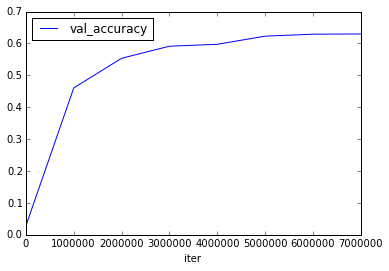

In [93]:
print("Parameters used", nn.train_params)
nn.resulting_scores()[['val_accuracy', 'iter']].plot(x='iter')
print("Training Accuracy", nn.score(X,y)/len(X))
print("Validation Accuracy", nn.score(XVal,yVal)/len(XVal))